In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


In [4]:
data = pd.read_csv("fifa_players.csv")

In [5]:
features = [
    "age", "height_cm", "weight_kgs", "overall_rating", "potential",
    "wage_euro", "crossing", "finishing", "dribbling", "stamina", "strength", "vision"
]
target = "value_euro"

In [6]:
data_clean = data[features + [target]].dropna()

In [7]:
X = pd.get_dummies(data_clean[features]) 
y = data_clean[target]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = model.predict(X_test)


In [12]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

RMSE: 1551844.1410768172
MAE: 823443.6868686868
R²: 0.9692901733416693


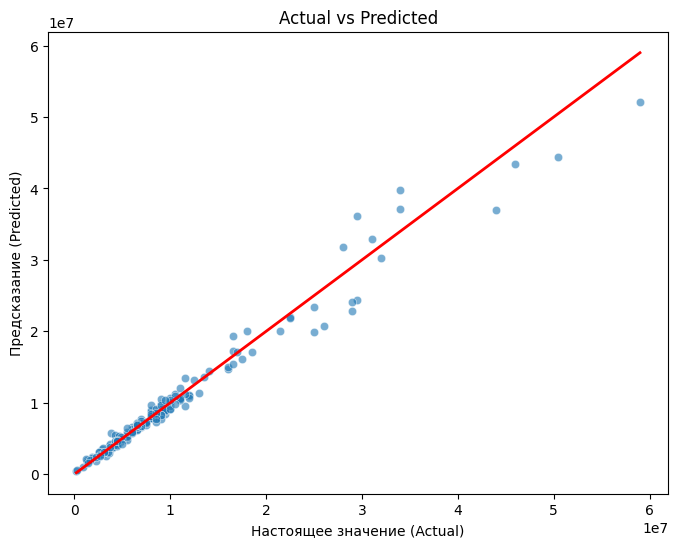

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Настоящее значение (Actual)")
plt.ylabel("Предсказание (Predicted)")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2)
plt.show()

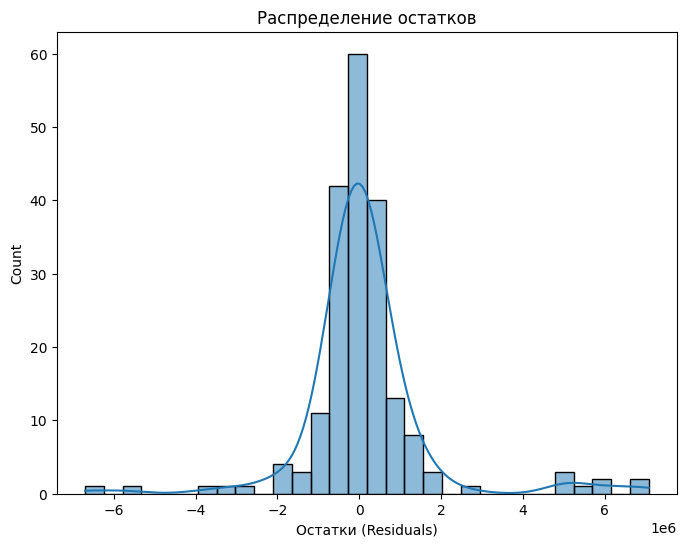

In [14]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Распределение остатков")
plt.xlabel("Остатки (Residuals)")
plt.show()

In [15]:
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test p-value:", shapiro_test.pvalue)
if shapiro_test.pvalue > 0.05:
    print("✅ Остатки распределены нормально.")
else:
    print("⚠️ Остатки не распределены нормально.")


Shapiro-Wilk Test p-value: 1.3270255266327546e-17
⚠️ Остатки не распределены нормально.


In [16]:
X_const = sm.add_constant(X_test)
bp_test = het_breuschpagan(residuals, X_const)
print("Breusch-Pagan Test p-value:", bp_test[1])
if bp_test[1] > 0.05:
    print("✅ Гомоскедастичность подтверждена (ошибки равномерны).")
else:
    print("⚠️ Нарушена гомоскедастичность (ошибки неравномерны).")

Breusch-Pagan Test p-value: 5.437482862986013e-17
⚠️ Нарушена гомоскедастичность (ошибки неравномерны).


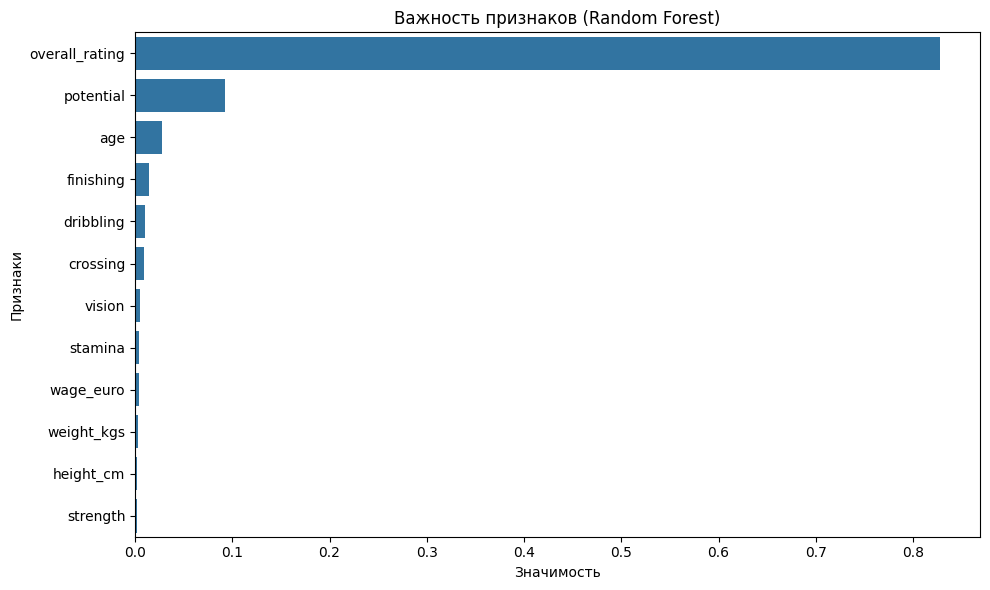

In [17]:
importance = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
importance_sorted = importance.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_sorted)
plt.title("Важность признаков (Random Forest)")
plt.xlabel("Значимость")
plt.ylabel("Признаки")
plt.tight_layout()
plt.show()


In [18]:
print("\nВажность признаков:\n")
print(importance_sorted)


Важность признаков:

           Feature  Importance
3   overall_rating    0.827486
4        potential    0.092640
0              age    0.027352
7        finishing    0.014222
8        dribbling    0.010699
6         crossing    0.008769
11          vision    0.004618
9          stamina    0.004205
5        wage_euro    0.004011
2       weight_kgs    0.002564
1        height_cm    0.001724
10        strength    0.001709


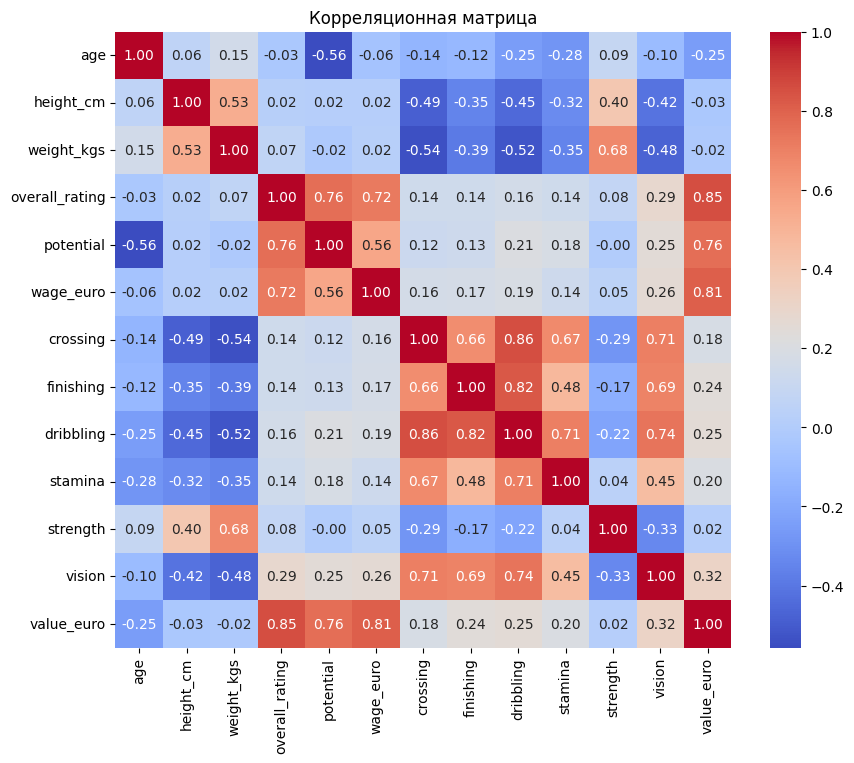

In [19]:
corr_matrix = data_clean[features + [target]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица")
plt.show()